In [1]:
# Some imports and default setup to begin with
import numpy as np
import matplotlib.pyplot as plt

# Display settings
import seaborn as sns
sns.set_theme()
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'copper'

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Homemade code

# Studied transformations: analytycal wavelets, analytical Stockwell
import Analytic_Stockwell_Transform as ast

# A class for all parameters
import transform_parameter as tp

# Computations of pair correlation functions
import hyper_pcf as pcf

# Displays
import hyper_display as disp

# 1. Set all the parameters and generate the signal to study

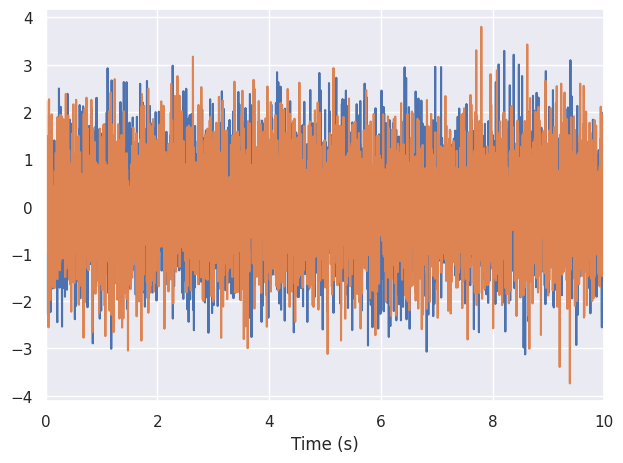

In [2]:
# Global parameters
alpha=300.0 
N = 4000
n_sc = 600

param = tp.Param(alpha,
                 N,
                 scale = 2**(np.linspace(6,-3.3,  n_sc)),
                tmax=10,
                 t0 = 5)

# If some seed needs to be fixed (e.g. to keep the remaining displays identical), now is the time :
np.random.seed(0)
noise =  np.random.randn(param.N) + np.random.randn(param.N)*1j

# If some signal has to be added, this is the place.
x = noise

plt.plot(param.time_t,np.imag(x))
plt.plot(param.time_t,np.real(x))
plt.xlim(param.time_t[0],param.time_t[-1])
plt.xlabel("Time (s)")
plt.tight_layout()

# 2. Compute and display in $\mathbb{C}_+$ the analytical Stockwell transform

In [3]:
AST,xi_Hz,scales = ast.the_ST_transform(noise,param)

mAST = np.abs(AST)
pAST = np.angle(AST)

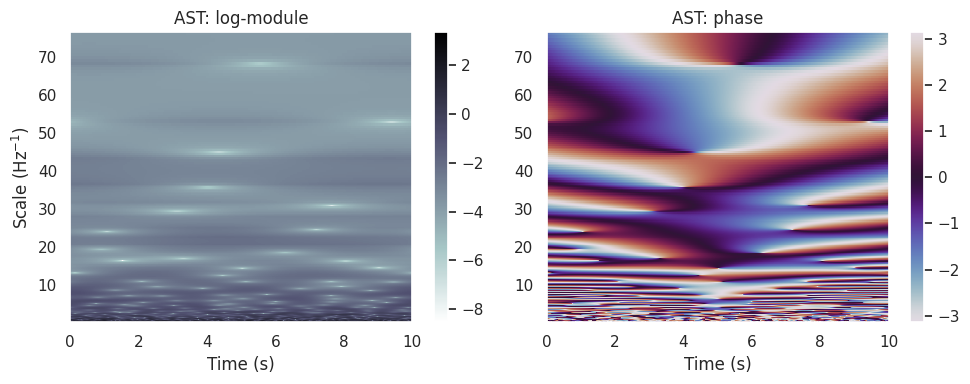

In [4]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pcolormesh(param.time_t,param.scale_corr, np.log(mAST),cmap=plt.cm.bone_r);
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Scale (Hz$^{-1}$)')
plt.title('AST: log-module')
plt.subplot(1,2,2)
plt.pcolormesh(param.time_t,param.scale_corr, pAST,cmap=plt.cm.twilight);
plt.colorbar()
plt.xlabel('Time (s)')
plt.title('AST: phase');
plt.tight_layout()

# 3. Estimate pair correlation functions 

In [5]:
#########################
# Radius over which the PCF will be estimated.
# Note that distances are computed on the complex upper-half plane in hyperbolic geometry.
r_max = 0.4
r_step = 0.01
r_min = 0.01
range_r = np.arange(r_min,r_max+r_step,r_step)

#########################
# The theoretical PCF is known for any given (alpha), it is computed as:
g_theo = pcf.g_hp2_scalaire(range_r,alpha,h=r_step)

# COmputation of the empirical PCF
g_AST =  pcf.est_g_from_Sww(mAST,param,range_r,r_step)

/home/courbot/Programmes/the analytical ST/Demo git V1/hyper_pcf.py:184: RuntimeWarning: invalid value encountered in divide
  second =  numer2/denom2


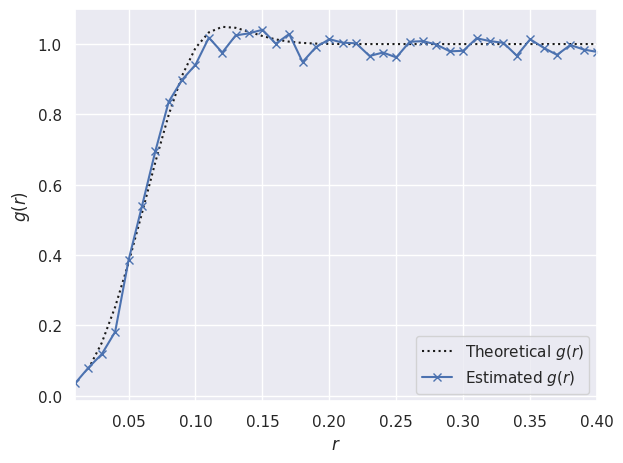

In [6]:
plt.plot(range_r,g_theo,':k',label='Theoretical $g(r)$')
plt.plot(range_r,g_AST,'x-',label='Estimated $g(r)$')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.xlim(range_r.min(),range_r.max())
plt.legend()
plt.tight_layout()

# 4. Display the transforms in a Poincare disk

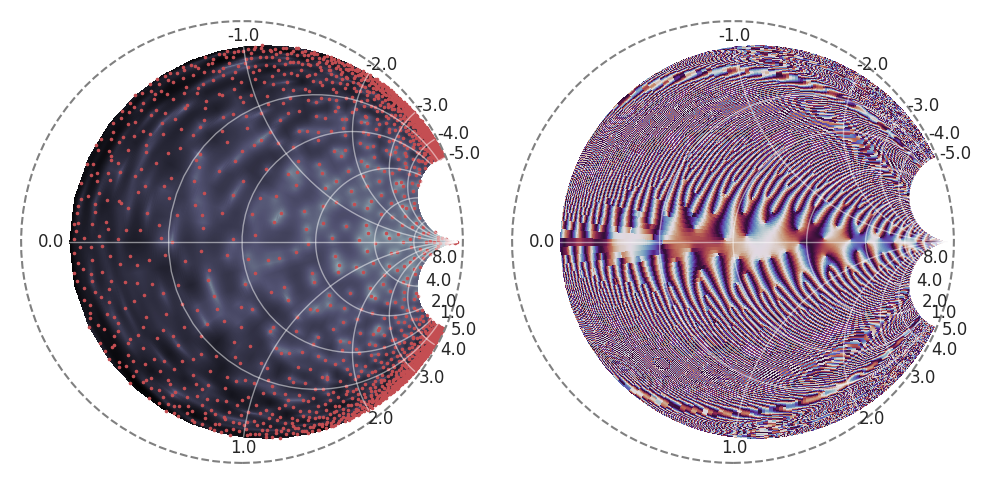

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
disp.plot_poincare(mAST,param,plt.cm.bone_r)

plt.subplot(1,2,2)
disp.plot_poincare(pAST,param,plt.cm.twilight,phase=True,with_zeros=False)
plt.tight_layout()